I started by importing pandas, sesaborn, matplotlib, and numpy in order to produce visuals.

In [141]:
import pandas as pd

In [310]:
import seaborn as sns

In [186]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

I took our joined dataset and created a dataframe labelled df.

In [151]:
df = pd.read_csv('joined_df.csv')

After our merge we had some duplicated columns, so I dropped those.

In [156]:
df = df.drop(['Unnamed: 0', 'Unnamed: 0_x', 'Unnamed: 0_y', 'Year_y'], axis=1)

I then sorted the dataframe by Runtime in ascending order. I did this because Runtime was the value that I was concerned with evaluating as the independent variable.

In [188]:
df = df.sort_values(by=['Runtime'])

I used describe to check the statistcs of the Runtime data. I did this for the interquartile range so that I could later test the same data without the outliers. I also wanted to see the mean, median, and standard deviation of the data.

In [312]:
df['Runtime'].describe()

count    1021.000000
mean      117.373164
std        24.136841
min        70.000000
25%       100.000000
50%       115.000000
75%       130.000000
max       240.000000
Name: Runtime, dtype: float64

I created a histogram of the Runtimes to check the skew of the data.

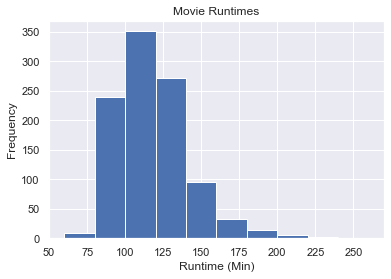

In [414]:
plt.hist(df['Runtime'], bins = 10, range=(60,260))
plt.title("Movie Runtimes")
plt.xlabel("Runtime (Min)")
plt.ylabel("Frequency")

plt.show()

I created a box plot to show if there were outliers.

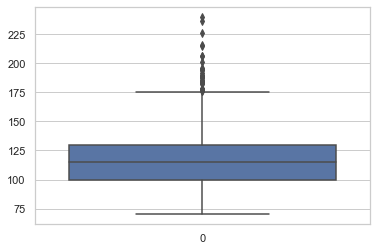

In [321]:
boxplot = sns.boxplot(data=df["Runtime"])

IMDB SCORES WITH OUTLIERS

I then explored the IMDb Score data. I was interested in the mean, median, and standard deviation, along with the interquartile range for the reasons enumerated earlier.

In [299]:
df['IMDb Score'].describe()

count    1021.000000
mean        6.753673
std         0.938950
min         3.400000
25%         6.100000
50%         6.700000
75%         7.400000
max         9.200000
Name: IMDb Score, dtype: float64

I created a histogram of the IMDb Scores to see the distribution of the data visually.

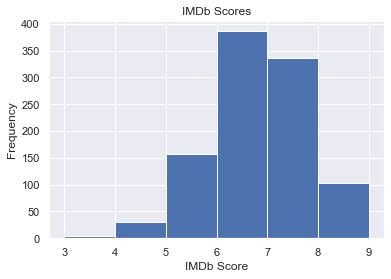

In [447]:
plt.hist(df['IMDb Score'], bins = 6, range=(3,9))

plt.title("IMDb Scores")
plt.xlabel("IMDb Score")
plt.ylabel("Frequency")

plt.show()

I created a boxplot of the data to see if there were outliers.

Text(0.5, 1.0, 'IMDb Score')

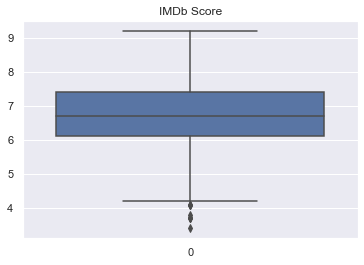

In [451]:
boxplot = sns.boxplot(data=df["IMDb Score"])
plt.title('IMDb Score')

I used describe to examine the statistics of movies with blow average Runtimes.

In [386]:
df[df['Runtime'] < df['Runtime'].mean()]['IMDb Score'].describe()

count    567.000000
mean       6.451675
std        0.887682
min        3.400000
25%        5.900000
50%        6.500000
75%        7.100000
max        8.500000
Name: IMDb Score, dtype: float64

I did the same thing for above average Runtimes.

In [387]:
df[df['Runtime'] > df['Runtime'].mean()]['IMDb Score'].describe()

count    454.000000
mean       7.130837
std        0.862473
min        3.700000
25%        6.600000
50%        7.200000
75%        7.700000
max        9.200000
Name: IMDb Score, dtype: float64

This showed me that the average was higher for movies that were longer than average. It also showed me that the standard deviation was lower.

I then ploted the data in a scatter plot with a regression line so that I could see if the data were correlated.

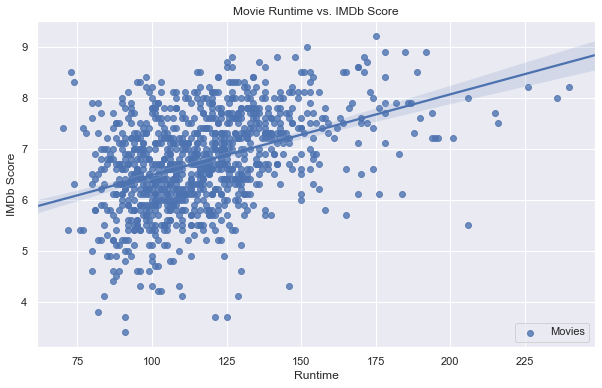

In [416]:
plt.figure(figsize=(10,6))
sns.regplot(df['Runtime'], df["IMDb Score"], label = 'Movies')
plt.title('Movie Runtime vs. IMDb Score')
plt.legend(loc='lower right')
plt.show()

I then checked the numerical value of the correlation between the data. 

In [412]:
df['Runtime'].corr(df['IMDb Score']) 

0.4070267607683957

I then repeated all of the previous steps for IMDb scores, except I removed the outliers. I ultimately chose to focus on the data without the outliers stripped because the correlation values didn't change that much.

I calculated the value of the lower whisker of the box plot. I did this because values that are lower than this are outliers.

In [425]:
iqr = 7.4 - 6.1
outlier = iqr*1.5 
lower_whisker = 6.1-outlier

1.950000000000001


4.149999999999999

Here, I created a new dataframe without the outlier data.

In [426]:
df_minus_score_outliers = df[df['IMDb Score'] > lower_whisker]

In [427]:
df_minus_score_outliers['IMDb Score'].describe()

count    1013.000000
mean        6.776802
std         0.905432
min         4.200000
25%         6.200000
50%         6.800000
75%         7.400000
max         9.200000
Name: IMDb Score, dtype: float64

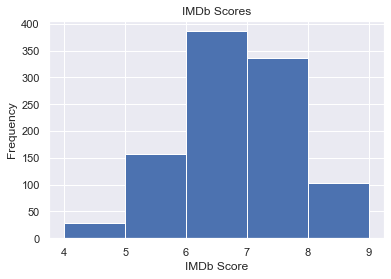

In [429]:
plt.hist(df_minus_score_outliers['IMDb Score'], bins = 5, range=(4,9))

plt.title("IMDb Scores")
plt.xlabel("IMDb Score")
plt.ylabel("Frequency")

plt.show()

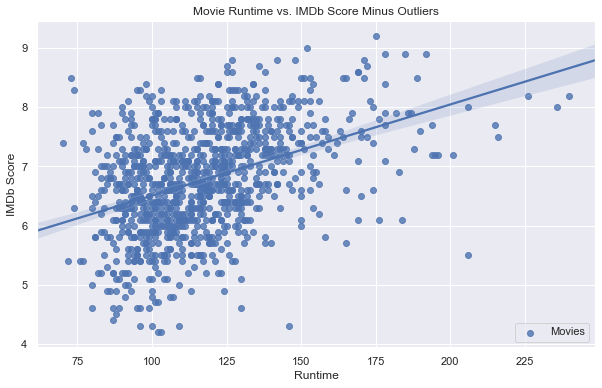

In [435]:
plt.figure(figsize=(10,6))
sns.regplot(df_minus_score_outliers['Runtime'], df_minus_score_outliers["IMDb Score"], label = 'Movies')
plt.title('Movie Runtime vs. IMDb Score Minus Outliers')
plt.legend(loc='lower right')
plt.show()

In [433]:
df_minus_score_outliers['Runtime'].corr(df_minus_score_outliers['IMDb Score']) 

0.41079496575325863

I then repeated all of the previous steps, but this time examining Runtime vs. Worldwide Lifetime Gross Revenue. This time however, I decided to focus on the dataframe with the outliers removed. I did this because the outliers had a significant effect on the correlation, making the data appear to be more closely correlated than they actaully were.

In [339]:
df['Worldwide Lifetime Gross'] = df['Worldwide Lifetime Gross'].astype(float)

In [340]:
df['Worldwide Lifetime Gross'].describe()

count    1.021000e+03
mean     3.119233e+08
std      2.441831e+08
min      1.172526e+08
25%      1.600786e+08
50%      2.224469e+08
75%      3.632589e+08
max      2.790439e+09
Name: Worldwide Lifetime Gross, dtype: float64

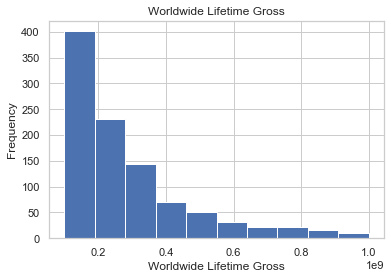

In [349]:
plt.hist(df['Worldwide Lifetime Gross'], bins = 10, range=(100000000,1000000000))

plt.title("Worldwide Lifetime Gross")
plt.xlabel("Worldwide Lifetime Gross")
plt.ylabel("Frequency")

plt.show()

Text(0.5, 1.0, 'Worldwide Lifetime Gross')

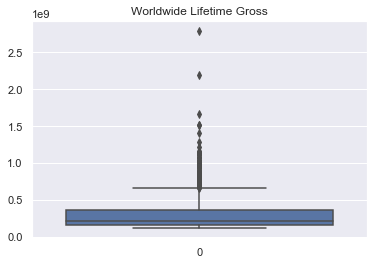

In [450]:
boxplot = sns.boxplot(data=df["Worldwide Lifetime Gross"])
plt.title('Worldwide Lifetime Gross')

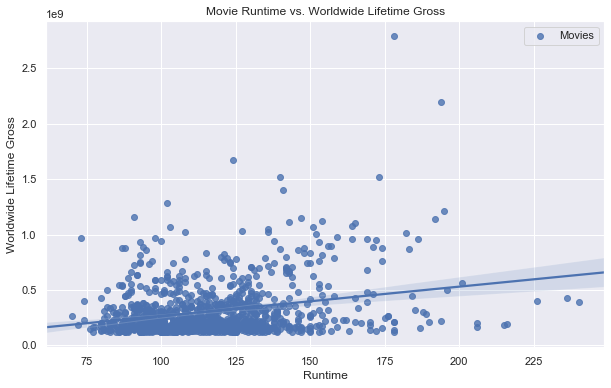

In [446]:
plt.figure(figsize=(10,6))
sns.regplot(df['Runtime'], df["Worldwide Lifetime Gross"], label = 'Movies')
plt.title('Movie Runtime vs. Worldwide Lifetime Gross')
plt.legend(loc='upper right')
plt.show()

In [422]:
df['Runtime'].corr(df["Worldwide Lifetime Gross"]) 

0.26107520888708896

In [372]:
iqr = 3.632589 - 1.600786
outlier = iqr*1.5 
upper_whisker = outlier + 3.632589
up_whisk_val = upper_whisker * 100000000
1.600786

668029350.0

In [375]:
df_minus_gross_outliers = df[df['Worldwide Lifetime Gross'] < up_whisk_val]

In [392]:
df_minus_gross_outliers['Worldwide Lifetime Gross'].describe()

count    9.350000e+02
mean     2.542439e+08
std      1.282820e+08
min      1.172526e+08
25%      1.560835e+08
50%      2.118179e+08
75%      3.216762e+08
max      6.670945e+08
Name: Worldwide Lifetime Gross, dtype: float64

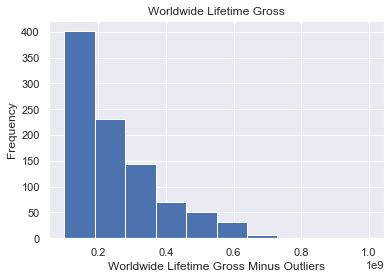

In [434]:
plt.hist(df_minus_gross_outliers['Worldwide Lifetime Gross'], bins = 10, range=(100000000,1000000000))

plt.title("Worldwide Lifetime Gross")
plt.xlabel("Worldwide Lifetime Gross Minus Outliers")
plt.ylabel("Frequency")

plt.show()

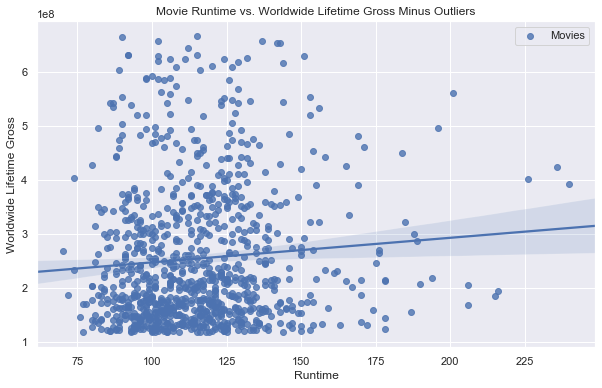

In [420]:
plt.figure(figsize=(10,6))
sns.regplot(df_minus_gross_outliers['Runtime'], df_minus_gross_outliers["Worldwide Lifetime Gross"], label = 'Movies')
plt.title('Movie Runtime vs. Worldwide Lifetime Gross Minus Outliers')
plt.legend(loc='upper right')
plt.show()

In [413]:
df_minus_gross_outliers['Runtime'].corr(df_minus_gross_outliers["Worldwide Lifetime Gross"]) 

0.0813070435463844

Movies with below average runtimes.

In [391]:
df_minus_gross_outliers[df_minus_gross_outliers['Runtime'] < df_minus_gross_outliers['Runtime'].mean()]['Worldwide Lifetime Gross'].describe()

count    5.070000e+02
mean     2.480204e+08
std      1.282129e+08
min      1.172526e+08
25%      1.520139e+08
50%      2.022929e+08
75%      3.044872e+08
max      6.670945e+08
Name: Worldwide Lifetime Gross, dtype: float64

Movies with above average runtimes. From the data we can see that movies that are longer than average have an average Worldwide Lifetime Gross of 262 million dollars, while those that were below average only earned 248 million dollars. The standard deviation was also about 100,000 dollars lower for the longer movies, indicating a slightly more predictable performance.

In [390]:
df_minus_gross_outliers[df_minus_gross_outliers['Runtime'] > df_minus_gross_outliers['Runtime'].mean()]['Worldwide Lifetime Gross'].describe()

count    4.280000e+02
mean     2.616161e+08
std      1.281224e+08
min      1.174875e+08
25%      1.600265e+08
50%      2.161867e+08
75%      3.475699e+08
max      6.583441e+08
Name: Worldwide Lifetime Gross, dtype: float64